# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

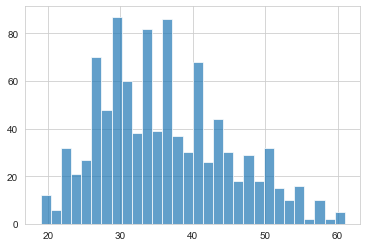

In [6]:
sns.set_style(style='whitegrid')
ad_data['Age'].hist(bins = 30, alpha = 0.7)

**Create a jointplot showing Area Income versus Age.**

<Figure size 864x720 with 0 Axes>

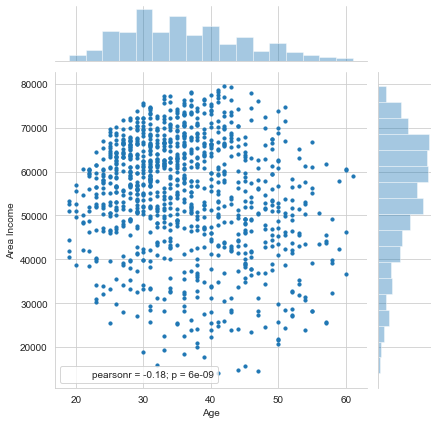

In [7]:
plt.figure(figsize = (12, 10))
g = sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data, s= 10)
g = g.annotate(stats.pearsonr)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

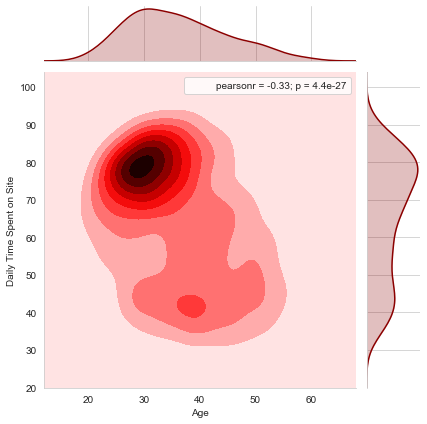

In [8]:
g = sns.jointplot(kind = 'kde', x = 'Age', y='Daily Time Spent on Site', data = ad_data, color = 'darkred')
g = g.annotate(stats.pearsonr)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

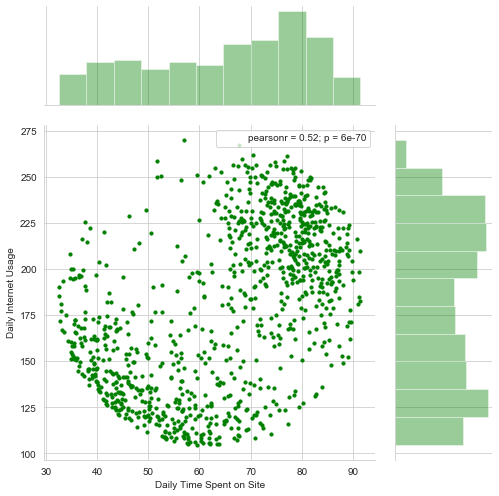

In [9]:
g = sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, s= 10, color = 'g', height =7,
                 ratio = 3)
g = g.annotate(stats.pearsonr)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

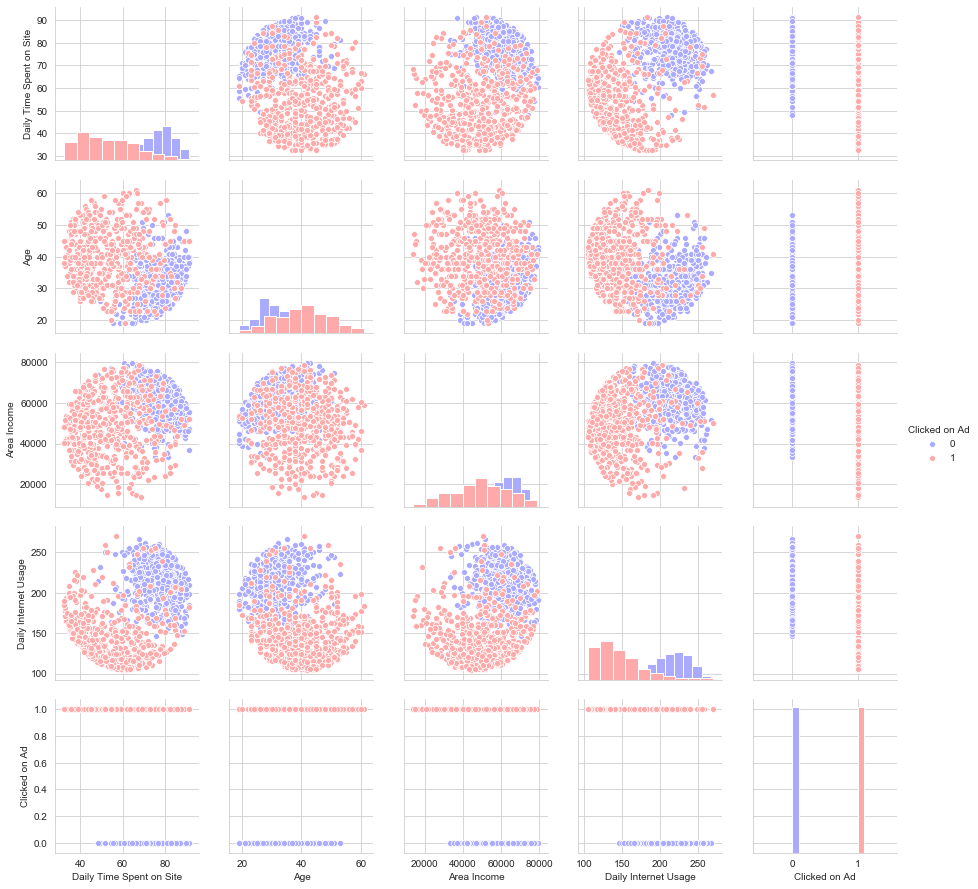

In [10]:
sns.pairplot(ad_data.drop(['Male'], axis =1 ), hue = 'Clicked on Ad', diag_kind ='hist', palette = 'bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [11]:
from sklearn.model_selection import train_test_split

In [53]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = ad_data['Clicked on Ad'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

** Train and fit a logistic regression model on the training set.**

In [55]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [56]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [57]:
predictions = log_model.predict(X_test)

** Create a classification report for the model.**

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.91      0.95      0.93       157
         Yes       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [60]:
con = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns =['P No', 'P Yes'], index = ['A No', 'A Yes'])
print(con)

       P No  P Yes
A No    149      8
A Yes    15    128


In [61]:
accuracy_score(y_test, predictions)

0.9233333333333333

In [62]:
matthews_corrcoef(y_test, predictions)

0.8469267000519434

In [63]:
PredictProb = log_model.predict_proba(X_test)
PredictProb

array([[0.00379202, 0.99620798],
       [0.92951289, 0.07048711],
       [0.88285064, 0.11714936],
       [0.00726655, 0.99273345],
       [0.94453614, 0.05546386],
       [0.00916496, 0.99083504],
       [0.01773907, 0.98226093],
       [0.43941013, 0.56058987],
       [0.00679711, 0.99320289],
       [0.01119896, 0.98880104],
       [0.9526052 , 0.0473948 ],
       [0.25425498, 0.74574502],
       [0.89629928, 0.10370072],
       [0.0173263 , 0.9826737 ],
       [0.00454379, 0.99545621],
       [0.01913154, 0.98086846],
       [0.93383394, 0.06616606],
       [0.97362224, 0.02637776],
       [0.00416445, 0.99583555],
       [0.96454454, 0.03545546],
       [0.01761584, 0.98238416],
       [0.87645221, 0.12354779],
       [0.05811737, 0.94188263],
       [0.79061717, 0.20938283],
       [0.85226707, 0.14773293],
       [0.65563106, 0.34436894],
       [0.83957135, 0.16042865],
       [0.33302693, 0.66697307],
       [0.15822211, 0.84177789],
       [0.62350409, 0.37649591],
       [0.

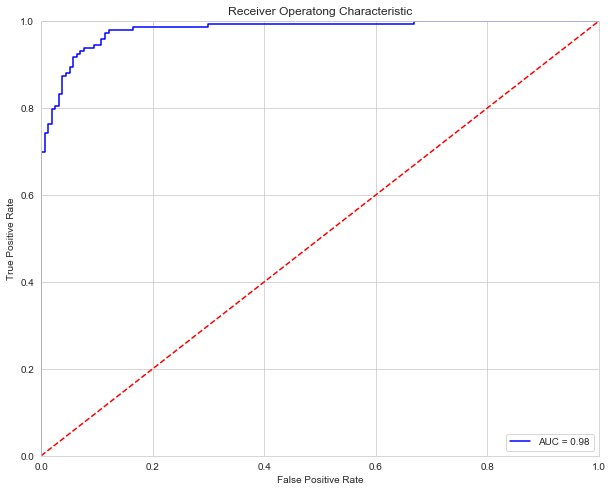

In [64]:
preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label = 'Yes')
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operatong Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

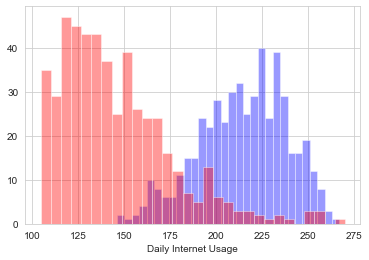

In [24]:
sns.distplot(ad_data[ad_data['Clicked on Ad'] == 0]['Daily Internet Usage'], bins = 30, kde =False, color ='Blue')
sns.distplot(ad_data[ad_data['Clicked on Ad'] == 1]['Daily Internet Usage'], bins = 30, kde =False, color ='Red' )

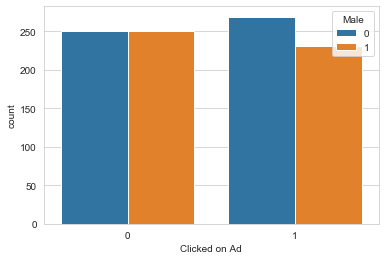

In [25]:
sns.countplot(ad_data['Clicked on Ad'], hue = ad_data['Male'])

## Great Job!